## Introduction

According to the World Health Organization, close to 800000 people take their own lives every year. Suicide was the second cause of death among 15-29 years-old in 2016. Apparently, there are many reasons underlying a person's decision to take her own life. However, those suffering from mental disorders, such as depression, or alcohol and drug abuse, seems to be at higher risk. Suicides might be commited by impulse, prompted by a person's inability to cope with a sudden life crises (e.g. the onset of an unexpected financial crises). The present work aims to make an Exploratory Data Analysis - an approch to visualize and gain insights from data - presenting its main results through graphs and charts.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\fabio\Documents\DataSets\csv_data\master.csv')

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
#The HDI for year variable has 19456 empty values. I'm going to drop it.

In [8]:
df = df.rename({df.columns[9] : 'GDP for year', df.columns[10] : 'GDP per Capita'}, axis=1).drop(['country-year','HDI for year'], axis=1)
df['GDP for year'] = df['GDP for year'].apply(lambda x:x.replace(',', '')).astype(np.int64)
df = df.query('year != 2016')

In [9]:
ages = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
genders = ['male', 'female']

In [10]:
from bokeh.io import output_notebook, output_file, show
from bokeh.plotting import figure
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource, NumeralTickFormatter, FactorRange, Div
from bokeh.models import Title
from bokeh.transform import factor_cmap
from bokeh.palettes import Plasma256, linear_palette, Inferno256
output_notebook()

Loading BokehJS ...

# Suicides Globally and by Country

In [11]:
def line_plot(x, y, p_width=400, p_height=400, color='blue', title='', legend='', x_label='', y_label=''):
    p = figure(plot_width=p_width, plot_height=p_height, title=title, toolbar_location=None)
    
    # Set line and circle glyphs
    p.line(x, y, line_width=2, color=color, legend=legend)
    p.circle(x, y, size=4, color=color, legend=legend)
    
    # Axis Attributes
    p.yaxis.axis_label = y_label
    p.xaxis.axis_label = x_label
    
    # Figure outline attributes
    p.outline_line_alpha = 0.4
    p.outline_line_width = 1.3
    p.outline_line_color = "gray"
    
    return p

In [12]:
population_year = df.groupby('year').sum().population.values
suicides_year = df.groupby('year').sum().suicides_no.values
suicides_per_100k_year = (suicides_year / population_year) * 100000
years = np.unique(df['year'].values)

In [13]:
p1 = line_plot(x=years, 
               y=suicides_year, 
               p_height=300, 
               p_width=350,
               color = "#718dbf",
               title='Suicides Globally, per Year')

p2 = line_plot(x=years,
               y=suicides_per_100k_year, 
               p_height=300, 
               p_width=350, 
               title='Suicides Globally, per 100k per Year',
               color="#e84d60")

# Set y-axis tick format
p1.yaxis.formatter=NumeralTickFormatter(format="0")
p2.yaxis.formatter=NumeralTickFormatter(format="0")

# Set title font size
p1.title.text_font_size = '11pt'
p2.title.text_font_size = '11pt'

# Set axes labels
p1.yaxis.axis_label = 'Suicides'
p1.xaxis.axis_label = 'Year'
p1.yaxis.axis_label_text_font_size='10.5pt'
p1.xaxis.axis_label_text_font_size='10.5pt'
p1.yaxis.axis_label_text_font_style='bold'
p1.xaxis.axis_label_text_font_style='bold'

p2.yaxis.axis_label = 'Suicides per 100k'
p2.xaxis.axis_label = 'Year'
p2.yaxis.axis_label_text_font_size='10.5pt'
p2.xaxis.axis_label_text_font_size='10.5pt'
p2.yaxis.axis_label_text_font_style='bold'
p2.xaxis.axis_label_text_font_style='bold'

### PLOTS FOR PERCENTAGE CHANGE 

data = df.groupby('year').sum()
data.loc[:, 'suicides/100k pop'] = suicides_per_100k_year


p_pct1 = line_plot(x=data.reset_index().year.values, 
              y=data.suicides_no.pct_change().values, 
              title='Pct. Change of Suicides, per Year',
              p_height=300,
              p_width=350,
              color='black')

p_pct2 = line_plot(x=data.reset_index().year.values, 
              y=data['suicides/100k pop'].pct_change().values, 
              title='Pct. Change of Suicides per 100k, per Year',
              p_height=300,
              p_width=350,
              color='black')

# Title attributes
p_pct1.title.text_font_size = '10pt'
p_pct2.title.text_font_size = '10pt'
p_pct1.title.text_font_style = 'bold italic'
p_pct2.title.text_font_style = 'bold italic'


# Axes attributes 
p_pct1.yaxis.axis_label='Pct. of Suicides'
p_pct1.xaxis.axis_label='Year'
p_pct1.yaxis.axis_label_text_font_size='10.5pt'
p_pct1.xaxis.axis_label_text_font_size='10.5pt'
p_pct1.yaxis.axis_label_text_font_style='bold'
p_pct1.xaxis.axis_label_text_font_style='bold'
p_pct1.yaxis.formatter=NumeralTickFormatter(format='0%')

p_pct2.yaxis.axis_label='Pct. of Suicides per 100k'
p_pct2.xaxis.axis_label='Year'
p_pct2.yaxis.axis_label_text_font_size='10.5pt'
p_pct2.xaxis.axis_label_text_font_size='10.5pt'
p_pct2.yaxis.axis_label_text_font_style='bold'
p_pct2.xaxis.axis_label_text_font_style='bold'
p_pct2.yaxis.formatter=NumeralTickFormatter(format='0%')


show(column(row(p1, p_pct1), row(p2, p_pct2)))

In [49]:
data = df.groupby(['country']).sum().suicides_no.nlargest(40).reset_index()

dt = df.groupby(['country']).sum()
suicides = dt.suicides_no.values
population = dt.population.values
suicides_per_100k = (suicides / population) * 1e5

dt['suicides/100k pop'] = suicides_per_100k
dt = dt['suicides/100k pop'].nlargest(40).reset_index()

In [50]:
countries = np.flip(data['country'].values)
suicides_country = np.flip(data['suicides_no'].values)
countries_100k = np.flip(dt['country'].values)
suicides_country_100k = np.flip(dt['suicides/100k pop'].values)

In [51]:
source = ColumnDataSource(data=dict(suicides_country_100k=suicides_country_100k, countries_100k=countries_100k, 
                                     color=linear_palette(Plasma256[50:100], 40)[::-1]))

p = figure(y_range=countries_100k,
           plot_height=700, 
           plot_width=550, 
           toolbar_location=None)

p.hbar(y='countries_100k',
       right='suicides_country_100k',
       height=0.8,
       source=source,
       color='color')

p.add_layout(Title(text="(Showing rates per 100000 individuals)", text_font_style="italic", text_font_size='11pt'), 'above')
p.add_layout(Title(text="Suicide Rates, by Country", text_font_size="16pt"), 'above')

# Axes attributes
p.x_range.start = 0
p.xaxis.formatter=NumeralTickFormatter(format="0")

# Set and adjust axes labels 
p.xaxis.axis_label = 'Suicides per 100k'
p.yaxis.axis_label='Country'
p.xaxis.axis_label_text_font_size='10.5pt'
p.yaxis.axis_label_text_font_size='11pt'
p.xaxis.axis_label_text_font_style='bold'
p.yaxis.axis_label_text_font_style='bold'

# Adjust y-axis major label font size
p.yaxis.major_label_text_font_size='10.6pt'

# Title attributes
p.title.text_font_size = '12pt'

# Figure outline attributes
p.outline_line_alpha = 0.4
p.outline_line_width = 1.3
p.outline_line_color = "gray"

show(p)

In [17]:
from bokeh.layouts import gridplot
from bokeh.palettes import Category20

In [18]:
data = df.groupby(['country', 'year']).sum().suicides_no

country_dict = dict(european_countries=['Russian Federation', 'Ukraine','France', 'Germany', 'United Kingdom', 'Sweden', 'Denmark', 'Norway', 'Poland','Lithuania','Italy','Spain'],
                    north_south_american_countries=['Canada', 'United States', 'Mexico', 'Guatemala', 'Panama', 'Colombia', 'Ecuador', 'Argentina', 'Brazil'],
                    east_southeast_asian_countries=['Japan','Republic of Korea','Thailand', 'Sri Lanka', 'Philippines', 'Singapore'])

In [19]:
plotList = []
gridList = []

for (index, countries) in enumerate(country_dict.values()):
    if index==1 or index==2: plotList=[]
    for country, color in zip(countries, Category20[len(countries)]):
        p = figure(title=country,toolbar_location=None)
        p.line(x=data[country].index.values, y=data[country].values, line_width=2, color=color)
        p.circle(x=data[country].index.values, y=data[country].values, size=4, color=color)
        
        # Set axes labels and y-axis tick format
        p.yaxis.axis_label = 'Suicides'
        p.xaxis.axis_label = 'Year'
        p.yaxis.formatter=NumeralTickFormatter(format="0.0a")
        
        # Set title font size
        p.title.text_font_size = '11pt'
        
        # Set Figure outline
        p.outline_line_color = "gray"
        p.outline_line_alpha = 0.4
        p.outline_line_width = 1.3
        
        plotList.append(p)
    gridList.append(plotList)
    
grid1 = gridplot(gridList[0], ncols=3, plot_width=250, plot_height=230, toolbar_location=None)
grid2 = gridplot(gridList[1], ncols=3, plot_width=250, plot_height=230, toolbar_location=None)
grid3 = gridplot(gridList[2], ncols=3, plot_width=250, plot_height=230, toolbar_location=None)

show(column(Div(text='<h1><b>Suicides per Year, by Country<b><h1>'),
            Div(text='<h2><i><b>European Countries<b><i><h2>'), 
            grid1,
            Div(text=''),
            Div(text=''),
            Div(text='<h2><i><b>North/Central/South American Countries<b><i><h2>'),
            grid2,
            Div(text=''),
            Div(text=''),
            Div(text='<h2><i><b>East/Southeast Asian Countries<b><i><h2>'), 
            grid3))

In [20]:
data = df.groupby(['country', 'year']).sum()
data['suicides/100k pop'] = (data['suicides_no'].values / data['population'].values) * 1e5

data = data['suicides/100k pop']

In [21]:
plotList = []
gridList = []

for index, countries in enumerate(country_dict.values()):
    if index==1 or index==2: plotList=[]
    for country, color in zip(countries, Category20[len(countries)]):
        p = figure(title=country, toolbar_location=None)
        x = data[country].index.values
        y = data[country].values
        p.line(x, y, line_width=2, color=color)
        p.circle(x, y, size=4, color=color)
        
        # Set axes labels
        p.yaxis.axis_label = 'Suicides per 100k'
        p.xaxis.axis_label = 'Year'
        
        # Set title font size
        p.title.text_font_size = '11pt'
        
        # Set Figure outline attributes
        p.outline_line_color = "gray"
        p.outline_line_alpha = 0.4
        p.outline_line_width = 1.3
        
        plotList.append(p)
    gridList.append(plotList)
    
grid1 = gridplot(gridList[0], ncols=3, plot_width=250, plot_height=230, toolbar_location=None)
grid2 = gridplot(gridList[1], ncols=3, plot_width=250, plot_height=230, toolbar_location=None)
grid3 = gridplot(gridList[2], ncols=3, plot_width=250, plot_height=230, toolbar_location=None)

show(column(Div(text='<h1><b>Suicides per 100k per Year, by Country<b><h1>'),
            Div(text='<h2><i><b>European Countries<b><i><h2>'), 
            grid1,
            Div(text=''),
            Div(text=''),
            Div(text='<h2><i><b>North/Central/South American Countries<b><i><h2>'), 
            grid2,
            Div(text=''),
            Div(text=''),
            Div(text='<h2><i><b>East/Southeast Asian Countries<b><i><h2>'), 
            grid3))

We can see from the above plots that the total number of suicides and the rates of suicide per 100000 people, varies between years. The number of suicides in the United States starts to exceed Russia in 2010. Rates of suicide per 100000 people per year show that in 1985, Sri Lanka had roughly the same rate as Russia in 1992. Moreover, we can see that there's missing data for Sri Lanka between 1986 and 1996 which makes it more difficult to draw accurate conclusions.

# Suicides by Age Range and Gender

In [52]:
data = df.suicides_no.groupby(df.age).sum().reindex(index=ages)
dt = df.groupby(['age', 'year']).sum().suicides_no.reindex(level='age', index=ages)

In [53]:
from bokeh.palettes import Set1
from bokeh.models import Legend

In [54]:
# BAR PLOT 
b = figure(x_range=ages, plot_height=400, plot_width=300, title='Suicides, by Age Range', toolbar_location=None)

# Set a vertical bar glyph
b.vbar(x=ages, top=data.values,  width=0.8)

# Set axes attributes
b.y_range.start = 0
b.xgrid.grid_line_color = None
b.yaxis.formatter=NumeralTickFormatter(format="0")

# Adjust x-axis major label
b.xaxis.major_label_orientation = 1
b.xaxis.major_label_text_font_size='9.3pt'

# Set y-axis label
b.yaxis.axis_label = 'Suicides'
b.yaxis.axis_label_text_font_style='bold'
b.yaxis.axis_label_text_font_size='10.5pt'

# Set outline attributes
b.outline_line_alpha = 0.4
b.outline_line_width = 1.3
b.outline_line_color = "gray"

# Set title font size
b.title.text_font_size = '12pt'


# LINE PLOT
l = figure(plot_width=560, plot_height=400, title='Suicides per Year, by Age Range', toolbar_location=None)

legendList = []

for age, color in zip(ages, Set1[6]):
    s = [l.line(x=dt[age].reset_index().year, y=dt[age].reset_index().suicides_no, color=color, line_width=2),
         l.circle(x=dt[age].reset_index().year, y=dt[age].reset_index().suicides_no, color=color, size=4)]
    
    legendList.append((age, s))

# Adjust axis tick format and labels
l.yaxis.formatter=NumeralTickFormatter(format="0")
l.xaxis.axis_label = 'Year'
l.xaxis.axis_label_text_font_style='bold'
    
# Add Legend to layout and sets its attributes
l.add_layout(Legend(items=legendList, location='center'), 'right')
l.legend.title_text_font_style = "bold"
l.legend.border_line_color = None
l.legend.title = "Age Range"

# Set outline attributes
l.outline_line_color = "gray"
l.outline_line_alpha = 0.4
l.outline_line_width = 1.3

# Set title font size
l.title.text_font_size = '12pt'

show(row(b, l))

In [55]:
dt = df.groupby(['age']).sum()
dt['suicides/100k pop'] = (dt.suicides_no.values / dt.population.values) * 1e5

dt = dt.reindex(ages)

In [56]:
data = df.groupby(['age', 'year']).sum().reindex(level='age', index=ages)

data['suicides/100k pop'] = (data.suicides_no / data.population) * 1e5

In [57]:
# BAR PLOT
b = figure(x_range=ages,plot_height=400, plot_width=300, title='Suicides by Age Range, per 100k', toolbar_location=None)

# Set a vertical bar glyph
b.vbar(x=ages, top=dt['suicides/100k pop'].values , width=0.8)

# Set axes attributes
b.y_range.start = 0
b.xgrid.grid_line_color = None
b.yaxis.formatter=NumeralTickFormatter(format="0")

# Adjust x-axis major label
b.xaxis.major_label_orientation = 1
b.xaxis.major_label_text_font_size='9.3pt'

# Set y-axis label
b.yaxis.axis_label = 'Suicides per 100k'
b.yaxis.axis_label_text_font_style='bold'
b.yaxis.axis_label_text_font_size='10.5pt'

# Set outline attributes
b.outline_line_alpha = 0.4
b.outline_line_width = 1.3
b.outline_line_color = "gray"

# Set title font size
b.title.text_font_size = '12pt'


# LINE PLOT
l = figure(plot_width=560, plot_height=400, title='Suicides by Age Range, per 100k per Year', toolbar_location=None)

legendList=[]

for age, color in zip(ages, Set1[6][::-1]):
    s =  [l.line(x=data.loc[age].reset_index().year.values, y=data.loc[age, 'suicides/100k pop'].values, color=color, line_width=2),
          l.circle(x=data.loc[age].reset_index().year.values, y=data.loc[age, 'suicides/100k pop'].values, color=color, size=4)]
    
    legendList.append((age, s))
    
# Adjust y-axis tick format and x-axis label
l.yaxis.formatter=NumeralTickFormatter(format="0")
l.xaxis.axis_label = 'Year'
l.xaxis.axis_label_text_font_style='bold'
    
# Add Legend to layout and sets its attributes
l.add_layout(Legend(items=legendList, location='center'), 'right')
l.legend.title_text_font_style = "bold"
l.legend.border_line_color = None
l.legend.title = "Age Range"

# Set outline attributes
l.outline_line_color = "gray"
l.outline_line_alpha = 0.4
l.outline_line_width = 1.3

# Set title font size
l.title.text_font_size = '12pt'

show(row(b, l))

In [59]:
data_sex_year = df.groupby(['sex', 'year']).sum()
data_sex_year['suicides/100k pop'] = (data_sex_year.suicides_no / data_sex_year.population) * 1e5

data_sex_age = df.groupby(['sex', 'age']).sum().reindex(level='age', index=ages).iloc[:, :-2]
data_sex_age['suicides/100k pop'] = (data_sex_age.suicides_no / data_sex_age.population) * 1e5

suicides_100k_women_year = data_sex_year.loc['female', 'suicides/100k pop'].values
suicides_100k_men_year = data_sex_year.loc['male', 'suicides/100k pop'].values

year = data_sex_year.reset_index().year.unique()

In [60]:
# LINE PLOTS

p1 = line_plot(year,
              data_sex_year.suicides_no.male.values,
              p_width=300, 
              p_height=190, 
              title='Suicides per Year, for Men',
              x_label='Year',
              y_label='Suicides')

p1.yaxis.formatter=NumeralTickFormatter(format="0a")
p1.title.text_font_size = '10pt'
p1.title.text_font_style="bold italic"

p2 = line_plot(year, 
               data_sex_year.suicides_no.female.values,
               p_width=300, 
               p_height=190,
               color='orange',
               title='Suicides per Year, for Women',
               x_label='Year',
               y_label='Suicides')

p2.yaxis.formatter=NumeralTickFormatter(format="0a")
p2.title.text_font_style="bold italic"
p2.title.text_font_size = '10pt'


# Plots for suicides per 100k
p3 = line_plot(year, 
               suicides_100k_men_year, 
               p_width=300, 
               p_height=190,
               color='blue',
               title='Suicide Rates per 100k, for Men',
               x_label='Year', 
               y_label='Suicides per 100k')

p3.title.text_font_style="bold italic"
p3.title.text_font_size = '10pt'

p4 = line_plot(year, 
               suicides_100k_women_year, 
               p_width=300, 
               p_height=190,
               x_label='Year',
               title='Suicide Rates per 100k, for Women',
               y_label='Suicides per 100k',
               color='orange'
              )

p4.title.text_font_style="bold italic"
p4.title.text_font_size = '10pt'

In [61]:
# BAR PLOTS

age_gender = [(age, gender) for age in ages for gender in genders] 

suicides = sum(zip(data_sex_age.loc['male', 'suicides_no'].tolist(), data_sex_age.loc['female', 'suicides_no'].tolist()), ())
suicides_per_100k_age = sum(zip(data_sex_age.loc['male', 'suicides/100k pop'].tolist(), data_sex_age.loc['female', 'suicides/100k pop'].tolist()), ())


source = ColumnDataSource(data=dict(age_gender=age_gender, 
                                    suicides=suicides, 
                                    suicides_per_100k_age=suicides_per_100k_age))


p5 = figure(x_range=FactorRange(*age_gender),
            plot_height=400, 
            plot_width=450,
            title='Suicides, by Age Range and Gender', 
            toolbar_location=None)

p6 = figure(x_range=FactorRange(*age_gender), 
            plot_height=400, 
            plot_width=450,
            title='Suicides per 100k, by Age Range and Gender',
            toolbar_location=None)

p5.vbar(x='age_gender', 
        top='suicides', 
        width=0.9, 
        source=source, 
        line_color='white',
        fill_color=factor_cmap('age_gender', palette=['blue', 'orange'], factors=genders, start=1, end=2))

p6.vbar(x='age_gender', 
        top='suicides_per_100k_age', 
        width=0.9, 
        source=source, 
        line_color='white',
        fill_color=factor_cmap('age_gender', palette=['blue', 'orange'], factors=genders, start=1, end=2))

# Set axes attributes
p5.y_range.start = 0
p5.x_range.range_padding = 0.01
p5.xgrid.grid_line_color = None

p6.y_range.start = 0
p6.x_range.range_padding = 0.01
p6.xgrid.grid_line_color = None

# Add y-axis label 
p5.yaxis.axis_label = 'Suicides'
p5.yaxis.axis_label_text_font_style='bold'
p5.yaxis.axis_label_text_font_size='10.5pt'

p6.yaxis.axis_label = 'Suicides per 100k'
p6.yaxis.axis_label_text_font_style='bold'
p6.yaxis.axis_label_text_font_size='10.5pt'

# Set Title font size 
p5.title.text_font_size = '12pt'
p6.title.text_font_size = '12pt'

# Set Outline attributes
p5.outline_line_color = "gray"
p5.outline_line_alpha = 0.4
p5.outline_line_width = 1.3

p6.outline_line_color = "gray"
p6.outline_line_alpha = 0.4
p6.outline_line_width = 1.3

# Set y-axis tick format and x-axis label orientation
p5.xaxis.major_label_orientation = 1
p5.xaxis.major_label_text_font_size='8.7pt'
p5.yaxis.formatter=NumeralTickFormatter(format="0.0a")

p6.xaxis.major_label_orientation = 1
p6.xaxis.major_label_text_font_size='8.7pt'
p6.yaxis.formatter=NumeralTickFormatter(format='0')

show(row(p5, column(p1, p2)))
show(row(p6, column(p3, p4)))

- From 1985 to 2015, the rate of suicides was higher for men than for women. 
- For every suicide committed by women, there were three suicides committed by men. 
- Rate of suicides per 100000 people per year peaks at 1995 for both genders. 
- Middle-aged men committed the most suicides.
- Men with 75 years of age or older had the highest rate, with more than 40 suicides per 100000 people.

In [33]:
from bokeh.core.properties import value

In [34]:
data_gender_year = df.groupby(['sex', 'year']).sum().suicides_no

years = list(data_gender_year.reset_index().year.unique().astype(str))

source = dict(years=years,
              male=data_gender_year.male.values,
              female=data_gender_year.female.values)

colors = ["#e84d60", "#718dbf"]

p = figure(x_range=source['years'], plot_height=400, plot_width=700, toolbar_location=None)
p.vbar_stack(['female', 'male'], x='years', width=0.8, color=colors, source=source, legend=[value(x) for x in ['female', 'male']])


# Set legend attributes
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

# Set outline attributes
p.outline_line_color = "gray"
p.outline_line_alpha = 0.4
p.outline_line_width = 1.3

# Set y-axis range and label
p.y_range.start = 0
p.yaxis.axis_label='Suicides'
p.yaxis.axis_label_text_font_style='bold'
p.yaxis.axis_label_text_font_size='10.5pt'

# Set y-axis format and label orientation
p.xaxis.major_label_orientation = 1
p.yaxis.formatter=NumeralTickFormatter(format="0")

# Add a Title to layout
p.add_layout(Title(text="(Showing proportions for each year, for both genders)", text_font_style="italic", text_font_size='11pt'), 'above')
p.add_layout(Title(text="Suicides Trends, from 1985 to 2015", text_font_size="16pt"), 'above')

show(p)

In [35]:
data = df.groupby(['sex', 'country']).sum().drop('year', axis=1)
countries = data.suicides_no.nlargest(40).reset_index().country.unique()

male = data.loc['male', 'suicides_no'][countries].values.tolist()
female = data.loc['female', 'suicides_no'][countries].values.tolist()

dataDict = dict(country=countries,
                female=female,
                male=male)

source = ColumnDataSource(dataDict)

colors = ["#e84d60", "#718dbf"]
gen = ['female', 'male']

In [36]:
p = figure(y_range=countries[::-1], plot_height=600, plot_width=700, toolbar_location=None)

# Set a horizontal stacked bar glyph
p.hbar_stack(gen, y='country', height=0.9, source=source, color=colors, legend=[value(x) for x in gen])

# Adds Title to layout
p.add_layout(Title(text="(Showing proportions of suicides, for both genders)", text_font_style="italic", text_font_size='11pt'), 'above')
p.add_layout(Title(text="Suicides, by Gender and Country", text_font_size="16pt"), 'above')

# Set axes attributes
p.x_range.start = 0
p.xaxis.formatter=NumeralTickFormatter(format="0")

# Set and adjust axes labels
p.xaxis.axis_label = 'Suicides'
p.yaxis.axis_label='Country'
p.xaxis.axis_label_text_font_size='10.5pt'
p.yaxis.axis_label_text_font_size='11pt'
p.xaxis.axis_label_text_font_style='bold'
p.yaxis.axis_label_text_font_style='bold'

# Adjust y-axis major label font size
p.yaxis.major_label_text_font_size='10.6pt'

# Set Legend location
p.legend.location = "center_right"

# Outline attributes
p.outline_line_alpha = 0.4
p.outline_line_width = 1.3
p.outline_line_color = "gray"

show(p)

In [37]:
data = df.groupby(['sex', 'country', 'year']).sum().suicides_no

In [38]:
plotList=[]

for country in countries:
    p = figure(title=country)
    for gender, color in zip(genders, ['#ED6825', '#FBB318']):
        p.line(x=data.loc[gender, country].reset_index().year.values, 
                   y=data.loc[gender, country].values, 
                   line_width=2, 
                   legend=('{}'.format(gender)).capitalize(), 
                   color=color)
        
        p.circle(x=data.loc[gender, country].reset_index().year.values, 
                     y=data.loc[gender, country].values, 
                     size=4, 
                     legend=('{}'.format(gender)).capitalize(), 
                     color=color)
        
    # Suicides for both genders
    p.line(x=data[:, country].groupby('year').sum().index.values, 
           y=data[:, country].groupby('year').sum().values, 
           line_width=2, 
           legend='Both', 
           color='red') 

    p.circle(x=data[:, country].groupby('year').sum().index.values, 
             y=data[:, country].groupby('year').sum().values, 
             size=4, 
             legend='Both', 
             color='red')
 
    # Set title text font size
    p.title.text_font_size = '12pt'
 
    # Set legend attributes
    p.legend.location = "bottom_right"
    p.legend.title_text_font_style = "bold"
    p.legend.label_text_font_size = '9pt'
    p.legend.background_fill_alpha = 0.5
    
    # Set axes labels and y axis tick format
    p.xaxis.axis_label = 'Year'
    p.yaxis.axis_label = 'Suicides'
    p.yaxis.axis_label_text_font_style='bold'
    p.xaxis.axis_label_text_font_style='bold'
    p.yaxis.formatter=NumeralTickFormatter(format="0")
    p.y_range.start = 0
    
    # Set outline attributes
    p.outline_line_alpha = 0.4
    p.outline_line_width = 1.3
    p.outline_line_color = "gray"
    
    # Append each Figure to a list
    plotList.append(p)
    
grid = gridplot(plotList, ncols=2, plot_width=340, plot_height=280, toolbar_location=None)
show(column(Div(text='<h2>Suicides per Year, by Gender and Country<h2>'), grid))

# Summary

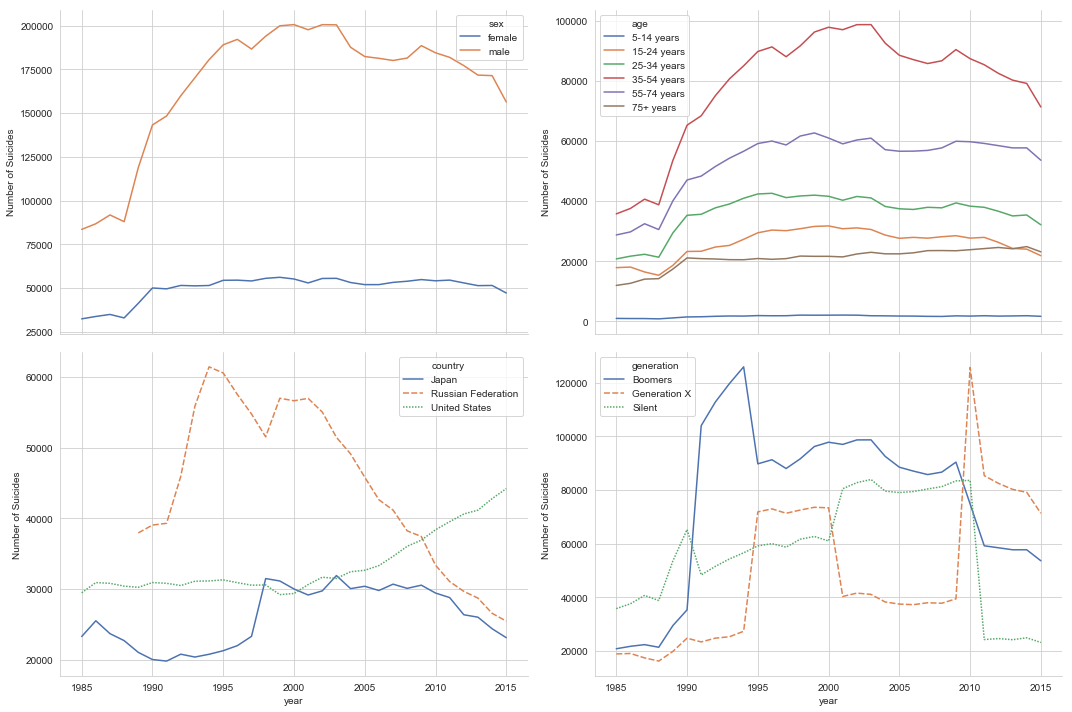

In [39]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, 
                       ncols=2, 
                       figsize=(15, 10), 
                       sharex=True)

generations = df.suicides_no.groupby(df.generation).sum().nlargest(3).index.tolist()
countries_a = ['Russian Federation', 'United States', 'Japan']

axes = np.copy(ax.flatten())
columns = ['sex', 'age', 'country', 'generation']
categories = [genders, ages, countries_a, generations]

for col, cat, axis in zip(columns, categories, axes):
    if col in ['age']:
        data = df.groupby([col, 'year']).sum().suicides_no.reindex(level=col, index=ages)
    else:
        data = df.groupby([col, 'year']).sum().suicides_no
    data = data[cat].reset_index()
    cond = col in ['generation', 'country']
    sns.lineplot(x='year', y='suicides_no', hue=col, style=col, data=data, sort=False, dashes=cond, ax=axis, palette='deep')
    axis.set_ylabel("Number of Suicides")
    
sns.despine()
plt.tight_layout()
plt.show()   

- As we have already seen, the rate of suicides for men is clearly higher than for women.
- Rates of suicide are higher between middle-aged men. 
- Suicides in Russia peaks in the first half of the 1990s, but it's declining ever since.
- The United States shows an almost linear rate between 1985 and 2000. However, from this point onwards, it starts to increase year after year. 
- Among the generations, Boomers have shown the highest rates of suicide, peaking around 1994*.


<font size="2">*The Generation variable doesn't furnish enough information. 
    Moreover, apparently there's no consensus on when a generation begins and ends. I decided to use it only for this particular plot.</font>

## Analysing correlation between variables

In [40]:
data = df.copy()
data = data.select_dtypes(include=['number'])

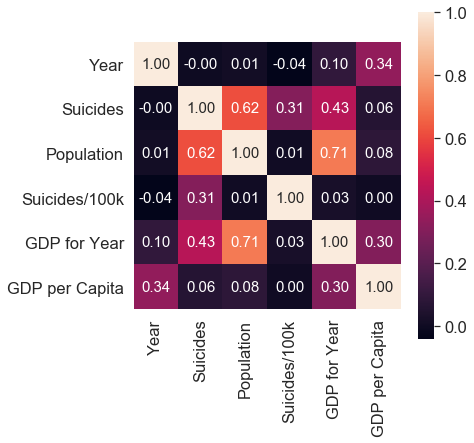

In [41]:
# Correlation Matrix

plt.figure(figsize=(6, 6))
xyticklabels = ['Year', 'Suicides', 'Population', 'Suicides/100k', 'GDP for Year', 'GDP per Capita']
cm = np.corrcoef(data[data.columns].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm,
            cbar=True,
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=xyticklabels,
            xticklabels=xyticklabels,
           )

plt.show()

As shown in the above correlation matrix, suicides and population show a strong, positive correlation. Suicides and GDP for year also show some degree of correlation. Correlation measures linear relationships between variables, and we're going to explore some of these relationships further in the next cells.

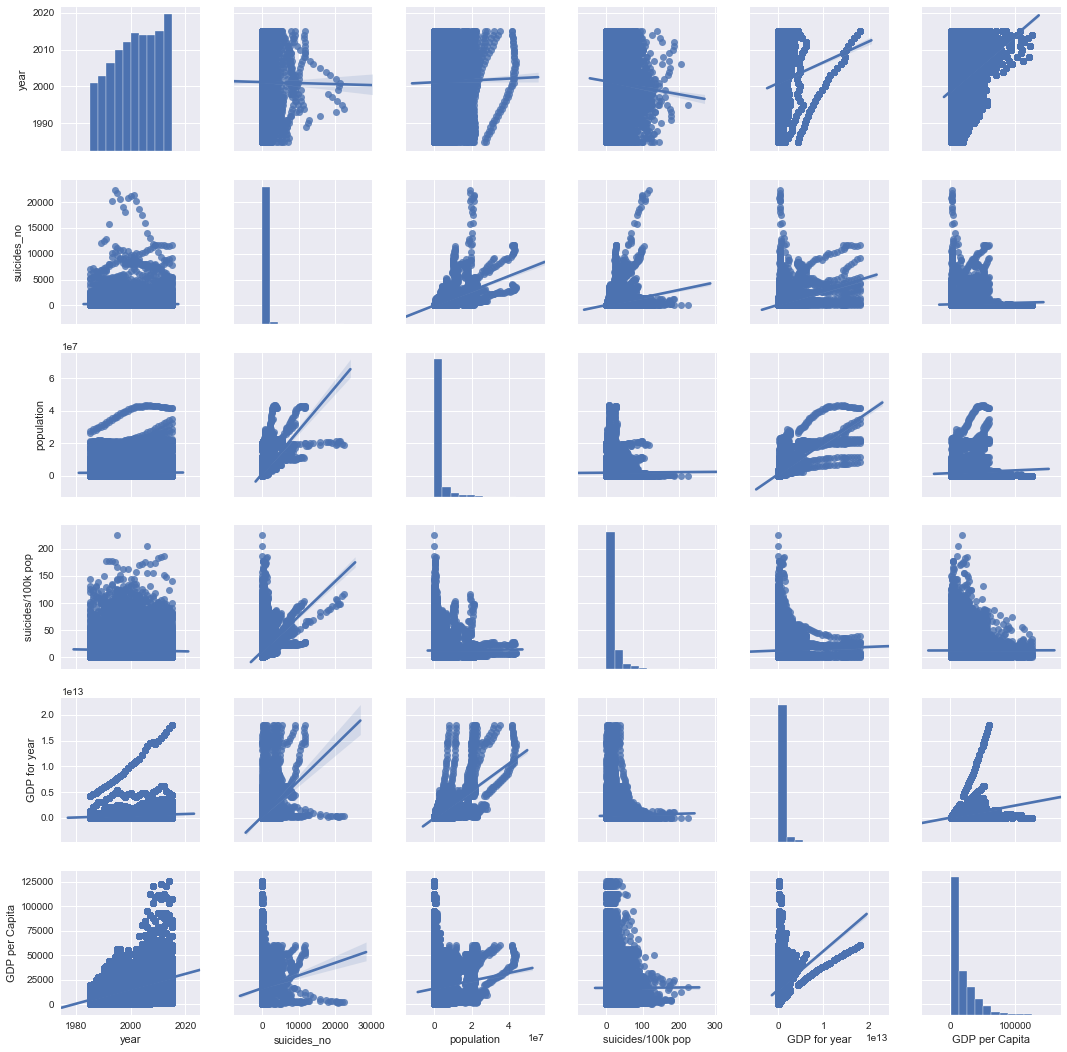

In [42]:
plt.style.use('seaborn')
sns.pairplot(data=df, kind='reg')
plt.show()

# Suicides and GDP per Capita 

In [43]:
from bokeh.models import LinearAxis, Range1d, Label

In [44]:
data = df.groupby(['country', 'year', 'GDP per Capita']).sum().suicides_no

In [45]:
data_gdp = data.reset_index()
gdpPercap, suicides = data_gdp['GDP per Capita'].values, data_gdp.suicides_no.values

In [46]:
# SCATTER PLOT
p_scatter = figure(toolbar_location = None, plot_height = 560, plot_width = 560, title = 'Suicides vs. GDP per Capita')

# Set scatter glyph
p_scatter.scatter(x = gdpPercap, y = suicides, fill_color = 'blue', size = 3)

# Set outline attributes
p_scatter.outline_line_alpha = 0.3
p_scatter.outline_line_width = 1.3
p_scatter.outline_line_color = "gray"

# Set title font size 
p_scatter.title.text_font_size = '13.5pt'

# Set axes labels
p_scatter.xaxis.axis_label = 'GDP per Capita'
p_scatter.yaxis.axis_label = 'Suicides'
p_scatter.yaxis.axis_label_text_font_style='bold'
p_scatter.xaxis.axis_label_text_font_style='bold'

# Set x-axis tick format 
p_scatter.xaxis.formatter=NumeralTickFormatter(format="($0,0)")


### POP-OUT TWO OUTLIERS

# Select one outlier from data
first_outlier = data_gdp.loc[data_gdp['suicides_no'] > 60000]

x_first_outlier = first_outlier['GDP per Capita'].values[0]
y_first_outlier = first_outlier.suicides_no.values[0]

# Select another outlier from data
condition = (data_gdp['GDP per Capita'] > 60000) & (data_gdp['GDP per Capita'] < 65000)

second_outlier = data_gdp.loc[condition & (data_gdp.suicides_no > 40000)]

x_second_outlier = np.asscalar(second_outlier['GDP per Capita'].values)
y_second_outlier = np.asscalar(second_outlier.suicides_no.values)

# Set label for the first outlier
firstLabel = Label(x = x_first_outlier, 
                   y = y_first_outlier, 
                   x_offset=1, 
                   y_offset=1,
                   text='Russian Federation, 1994',
                   render_mode='css', 
                   text_font_size = '9pt',
                   text_font_style = 'italic')

# Set label for the second outlier 
secondLabel = Label(x = x_second_outlier, 
                    y = y_second_outlier, 
                    x_offset=1, 
                    y_offset=1,
                    text='United States, 2015',
                    render_mode='css', 
                    text_font_size = '9pt',
                    text_font_style = 'italic')

# Add outliers labels to layout
p_scatter.add_layout(firstLabel)
p_scatter.add_layout(secondLabel)

# Pop-out both outliers
p_scatter.circle(x = x_first_outlier, y = y_first_outlier, color = 'red', size = 4)
p_scatter.circle(x = x_second_outlier, y = y_second_outlier, color = 'green', size = 4)

show(p_scatter)

In [47]:
def grid(data=None, countries=None, text=''):
    plotList=[]
    for country in countries:
        p = figure(title=country)
        
        p.line(x=data[country].reset_index().year.values, 
               y=data.loc[country].values, 
               line_width=2, 
               legend='Suicides',
               color='blue')
        
        p.circle(x=data[country].reset_index().year.values, 
                 y=data.loc[country].values, 
                 size=4, 
                 legend='Suicides', 
                 color='blue')
        
        p.yaxis.axis_label = 'Suicides'
        p.xaxis.axis_label='Year'
        p.yaxis.axis_label_text_font_style='bold'
        p.xaxis.axis_label_text_font_style='bold'
        p.y_range.start = 0
        
        # Add an extra y range
        p.extra_y_ranges = {"GDP per Capita": Range1d(start=0, end=data[country].reset_index()['GDP per Capita'].values.max()+1e2)}
        p.add_layout(LinearAxis(y_range_name='GDP per Capita', axis_label='GDP per Capita', axis_label_text_font_style='bold'), 'right')
        
        
        p.line(x=data[country].reset_index().year.values, 
               y=data[country].reset_index()['GDP per Capita'].values, 
               legend='GDP per Capita', line_width=2, color='red',
               y_range_name='GDP per Capita')
        
        p.circle(x=data[country].reset_index().year.values, 
                 y=data[country].reset_index()['GDP per Capita'].values, 
                 size=4, legend='GDP per Capita', color='red',
                 y_range_name='GDP per Capita')
        
        p.yaxis.formatter=NumeralTickFormatter(format="0")
        #p.extra_y_ranges.start = 0
        p.title.text_font_size = '12pt'
        p.legend.label_text_font_size = '9pt'
        p.legend.location = "bottom_right"
        p.legend.background_fill_alpha=0.3
        
        plotList.append(p)
        
    grid = gridplot(plotList, ncols=2, plot_width=390, plot_height=300, toolbar_location=None)
    show(column(Div(text=text), grid))

In [48]:
grid(data=data, countries=country_dict['european_countries'], text='<h2>Rates of Suicide and GDP per Capita - European Countries<h2>')
grid(data=data, countries=country_dict['east_southeast_asian_countries'], text='<h2>Rates of Suicide and GDP per Capita - East/Southeast Asian Countries<h2>')

Some of the above graphs sugests that there is a correlation between increasing rates of suicide and GDP per capita for a particular country and year. For Russia, rates of suicide starts to decrease as GDP per Capita increases. As for the East/Southeast Asian countries, such as Korea, Japan and Thailand, there is a substantial increase in rates of suicide between 1997 and 1998 (with a drastic drop in GDP per capita) probably due to a [financial crisis](https://en.wikipedia.org/wiki/1997_Asian_financial_crisis) that affected some Asian countries in this period. There is a paper exploring this subject (see the abstract: https://www.ncbi.nlm.nih.gov/pubmed/19200631 ). However, it is worth to recall that correlation does not imply causation, and there are certainly multiple factors underlying increasing rates of suicide.